# 패키지 및 데이터 로딩

- Statmodels는 Python에서 통계 모델링을 위한 기능을 제공하는 라이브러리이다
- Longley 데이터셋에는 공선성이 매우 높은 것으로 알려진 다양한 미국 거시경제 변수가 포함되어 있다
- 독립변수 설명    
    - GNPDEFL - GNP 디플레이터
    - GNP - GNP(국민총생산)
    - UNEMP - 실업자 수
    - ARMED - 무장 세력 규모
    - POP - 인구
    - YEAR - 연도 (1947-1962)
- 종속변수
    - TOTEMP - 총 고용

In [1]:
from statsmodels.datasets.longley import load_pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- load_pandas() 의 Dataset 객체 속성
    - data: DataFrame 객체로 전체 데이터 반환
    - endog: Series 객체로 종속변수 값 반환
    - exog: DataFrame 객체로 독립변수 값 반환

In [2]:
data = load_pandas()
print(type(data))
print(type(data.data))
df = data.data
print(df.shape)
df.head()

<class 'statsmodels.datasets.utils.Dataset'>
<class 'pandas.core.frame.DataFrame'>
(16, 7)


,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


In [3]:
# y: 총 파생 고용
dfy = data.endog
print(dfy)
dfX = data.exog
print(dfX)

0     60323.0
1     61122.0
2     60171.0
3     61187.0
4     63221.0
5     63639.0
6     64989.0
7     63761.0
8     66019.0
9     67857.0
10    68169.0
11    66513.0
12    68655.0
13    69564.0
14    69331.0
15    70551.0
Name: TOTEMP, dtype: float64
    GNPDEFL       GNP   UNEMP   ARMED       POP    YEAR
0      83.0  234289.0  2356.0  1590.0  107608.0  1947.0
1      88.5  259426.0  2325.0  1456.0  108632.0  1948.0
2      88.2  258054.0  3682.0  1616.0  109773.0  1949.0
3      89.5  284599.0  3351.0  1650.0  110929.0  1950.0
4      96.2  328975.0  2099.0  3099.0  112075.0  1951.0
5      98.1  346999.0  1932.0  3594.0  113270.0  1952.0
6      99.0  365385.0  1870.0  3547.0  115094.0  1953.0
7     100.0  363112.0  3578.0  3350.0  116219.0  1954.0
8     101.2  397469.0  2904.0  3048.0  117388.0  1955.0
9     104.6  419180.0  2822.0  2857.0  118734.0  1956.0
10    108.4  442769.0  2936.0  2798.0  120445.0  1957.0
11    110.8  444546.0  4681.0  2637.0  121950.0  1958.0
12    112.6  482704

# 독립변수간 상관관계 확인
- 다중회귀분석에서 설명변수들 사이에 선형관계가 존재하면 회귀계수의 정확한 추정이 힘들다

In [5]:
import warnings
warnings.filterwarnings(action='ignore')

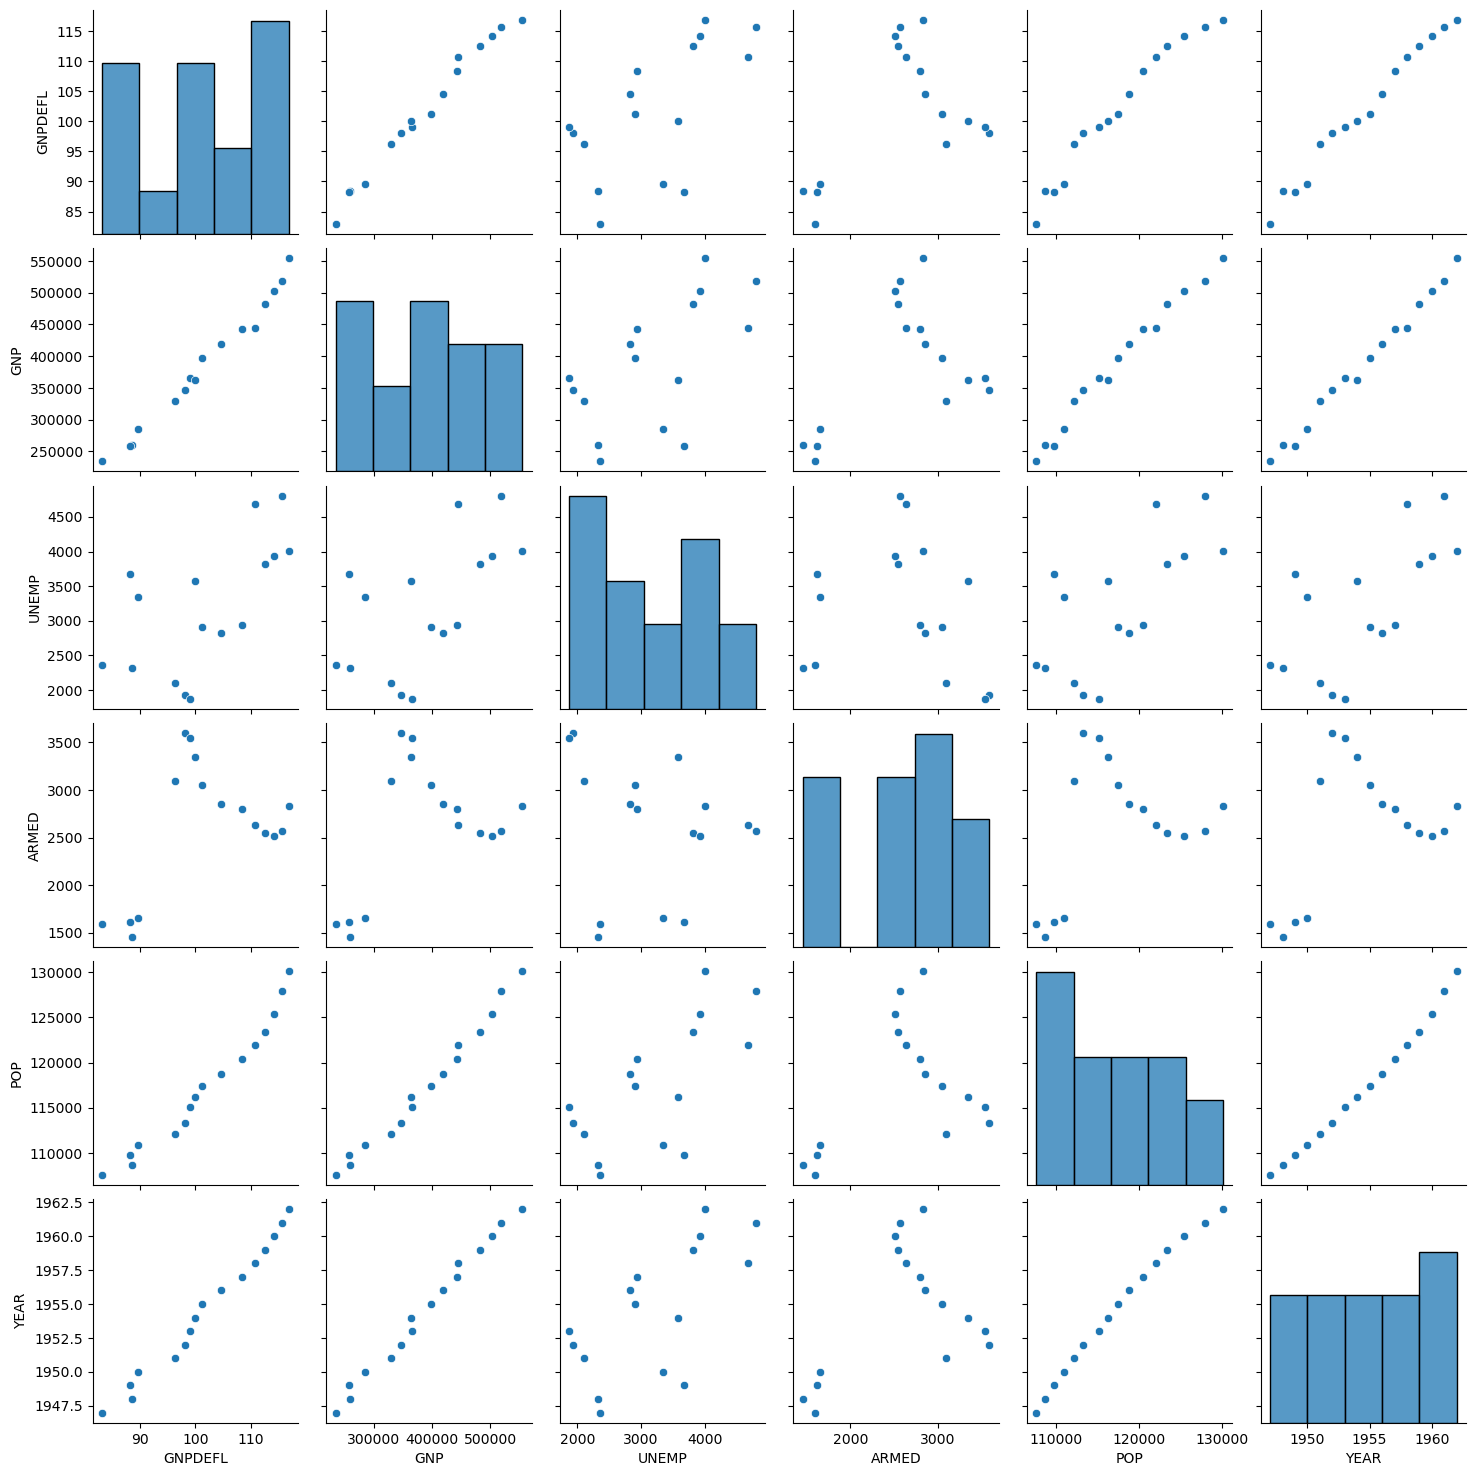

In [6]:
plt.style.use('default')
sns.pairplot(dfX)
plt.show()

In [4]:
dfX.corr()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
GNPDEFL,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273
UNEMP,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257
ARMED,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245
POP,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953
YEAR,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000


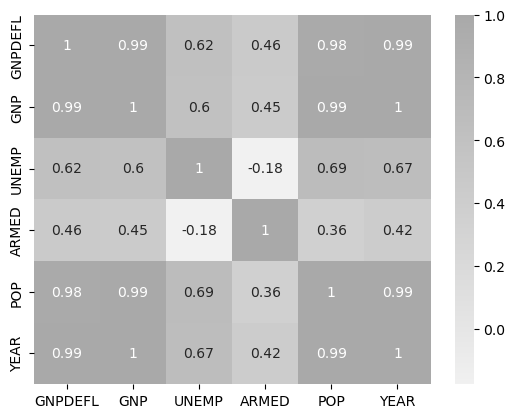

In [5]:
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, cmap=cmap)
plt.show()

# VIF 값 확인
- 다중 공선성을 없애는 가장 기본적인 방법은 다른 독립변수에 의존하는 변수를 없애는 것
- 가장 의존적인 독립변수를 선택하는 방법으로는 VIF(Variance Inflation Factor)를 사용할 수 있다.

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif

,VIF Factor,features
0,12425.514335,GNPDEFL
1,10290.435437,GNP
2,136.224354,UNEMP
3,39.983386,ARMED
4,101193.161993,POP
5,84709.950443,YEAR


## 독립변수 스케일링 후 VIF 값 확인

In [7]:
from sklearn.preprocessing import StandardScaler

dfX_scaled = StandardScaler().fit_transform(dfX)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX_scaled, i) for i in range(dfX_scaled.shape[1])]
vif["features"] = dfX.columns
vif

,VIF Factor,features
0,135.532438,GNPDEFL
1,1788.513483,GNP
2,33.618891,UNEMP
3,3.588930,ARMED
4,399.151022,POP
5,758.980597,YEAR


# 선형회귀분석 - 1

## 다중공선성 제거 전 모델 학습

In [8]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

In [9]:
x_train, x_test, y_train, y_test = train_test_split(dfX_scaled,         
                                                    dfy,            
                                                    test_size = 0.4,     
                                                    random_state=10) 

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
print(model.score(x_test, y_test))

0.9284222634576447


In [12]:
result = cross_validate(model, dfX_scaled, dfy, cv=5, scoring=['r2'])
for key, val in result.items():
    print('평가지표:',key)
    print('평균값:',np.round(np.mean(val),4))
    print('-'*30)

평가지표: fit_time
평균값: 0.001
------------------------------
평가지표: score_time
평균값: 0.0004
------------------------------
평가지표: test_r2
평균값: -11.7403
------------------------------


## 다중공선성 제거 후 모델 학습

In [13]:
dfX = dfX[['UNEMP', 'ARMED', 'GNP']]

In [14]:
dfX_scaled = StandardScaler().fit_transform(dfX)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(dfX_scaled,         
                                                    dfy,            
                                                    test_size = 0.4,     
                                                    random_state=10) 

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
print(model.score(x_test, y_test))

0.9762257664068986


In [34]:
result = cross_validate(model, dfX_scaled, dfy, cv=5, scoring=['r2'])
for key, val in result.items():
    print('평가지표:',key)
    print('평균값:',np.round(np.mean(val),4))
    print('-'*30)

평가지표: fit_time
평균값: 0.001
------------------------------
평가지표: score_time
평균값: 0.0002
------------------------------
평가지표: test_r2
평균값: -6.2885
------------------------------


# 선형회귀분석 - 2

## 다중공선성 제거 전 모델 학습

- statsmodels 모듈의 OLS()와 ols() 활용
    - 각종 통계지표 및 독립변수들의 유의성 검정을 위한 p-value 확인 가능
    - OLS()
        - 모형식에서 절편항이 제거된 상태로 분석이 이루어짐
        - 절편항 분석 결과 표시를 위해 독립변수 데이터에 절편항 데이터 추가 필요
        - OLS(종속변수, 독립변수)
    - statsmodels.fomula.api.ols()
        - 독립변수와 종속변수 값을 직접 입력하지 않고 변수 이름을 활용하여 모형식을 입력한 후 선형회귀분석을 실행
        - 모형식을 이용하면 상수항 추가나 범주형 변수의 더미변수화를 자동으로 해준다
        - 모형식의 변수에 scale을 표시하면 변수에 표준정규화를 적용해준다
        - 독립변수가 범주형 값이지만 숫자로 된 경우에는 C를 표시하여 해당 독립변수가 범주형임을 표시한다.
        - ols(모형식, data=데이터셋), (모형식: "출력변수 ~ 입력변수1 + 입력변수2 + ...")
    - fit() 함수로 모형 추정: 추정 결과는 RegressionResults 클래스 객체로 반환
        - RegressionResults 객체는 결과를 보기 위한 summary() 함수와 예측을 위한 prediction() 함수를 제공한다.

In [50]:
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

def get_model1(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = ols("TOTEMP ~ GNPDEFL + POP + GNP + YEAR + ARMED + UNEMP", data=df_train)
#     model = ols("TOTEMP ~ scale(GNPDEFL) + scale(POP) + scale(GNP) + scale(YEAR) + scale(ARMED) + scale(UNEMP)", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     437.5
Date:                Fri, 01 Sep 2023   Prob (F-statistic):             0.0366
Time:                        13:10:52   Log-Likelihood:                -44.199
No. Observations:                   8   AIC:                             102.4
Df Residuals:                       1   BIC:                             103.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.235e+07   2.97e+06     -4.165      0.1

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 독립변수의 p-value 확인
-  유의수준 5%하에서 F통계량의 P값이 0.05보다 작으면 추정된 회귀식은 통계적으로 유의하다고 볼수 있다
- 회귀분석 결과 결정계수 값은 1로 모델의 설명력이 매우 높다고 볼 수 있으나, 각 독립변수의 회귀계수의 p-value 값이 모두 0.05 보다 크므로 통계적으로 유의하지 않다고 볼 수 있다.

### 모델의 과적합 여부 확인
- 학습 데이터 R2: 1
- 검증 데이터 R2: 0.92
- 학습 성능과 검증 성능간의 차이가 있음: 과적합 발생

In [17]:
from sklearn.metrics import r2_score
import numpy as np

r2_scores1 = []
for i in range(10):
    df_train, df_test, result = get_model1(i)
    y_hat = result.predict(df_test)
    r2_scores1.append(r2_score(df_test['TOTEMP'], y_hat))

print(f'평가 데이터 결정계수 평균값: {np.mean(np.array(r2_scores1)):.2f}')

평가 데이터 결정계수 평균값: 0.92


## 다중공선성 제거 후 모델 학습
- VIF를 사용하여 독립 변수를 선택하면 GNP, ARMED, UNEMP 세가지 변수만으로도 비슷한 수준의 성능이 나온다는 것을 알 수 있다.

In [58]:
def get_model2(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = ols("TOTEMP ~ scale(GNP) + scale(ARMED) + scale(UNEMP)", data=df_train)
#     model = ols("TOTEMP ~ GNP + ARMED + UNEMP", data=df_train)#, scale=True)
#     model = ols("TOTEMP ~ scale(GNPDEFL) + scale(POP) + scale(YEAR)", data=df_train)
    return df_train, df_test, model.fit()

df_train, df_test, result = get_model2(3)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     118.6
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           0.000231
Time:                        13:33:08   Log-Likelihood:                -57.695
No. Observations:                   8   AIC:                             123.4
Df Residuals:                       4   BIC:                             123.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.538e+04    163.988    398.686   

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [57]:
r2_scores2 = []
for i in range(10):
    df_train, df_test, result = get_model2(i)
    y_hat = result.predict(df_test)
    r2_scores2.append(r2_score(df_test['TOTEMP'], y_hat))

print(f'평가 데이터 결정계수 평균값: {np.mean(np.array(r2_scores2)):.2f}')

평가 데이터 결정계수 평균값: 0.89


### 모델의 과적합 여부 확인
- 학습 데이터 R2: 0.99
- 검증 데이터 R2: 0.97
- 학습 성능과 검증 성능간의 차이가 줄어듬: 과적합 해결

# 보스톤 집값 예측 데이터의 변수 선택

In [3]:
from sklearn.datasets import load_boston
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore')

In [57]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
display(df.head())
print(df.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [50]:
X = boston.data
y = boston.target

In [58]:
from sklearn.preprocessing import StandardScaler

scaled_X = StandardScaler().fit_transform(X)
scaled_y = StandardScaler().fit_transform(y.reshape(-1, 1))
scaled_df = pd.DataFrame(scaled_X, columns=boston.feature_names)
scaled_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


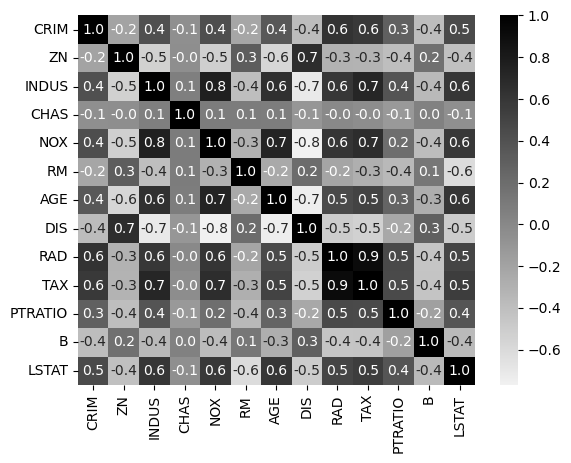

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.light_palette("black", as_cmap=True)
sns.heatmap(scaled_df.corr(), annot=True, fmt='3.1f', cmap=cmap)
plt.show()

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = scaled_df
vif = pd.DataFrame()
vif['VIF Factor'] = [ variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['features'] = data.columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
vif

,VIF Factor,features
0,1.073995,CHAS
1,1.348521,B
2,1.792192,CRIM
3,1.799084,PTRATIO
4,1.933744,RM
5,2.298758,ZN
6,2.941491,LSTAT
7,3.100826,AGE
8,3.955945,DIS
9,3.991596,INDUS


In [62]:
from statsmodels.formula.api import ols
import numpy as np

scaled_df['MEDIV'] = y
cols = scaled_df.drop('MEDIV', axis=1).columns
model_1 = ols('MEDIV ~ '+' + '.join(cols), data=scaled_df)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  MEDIV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          6.72e-135
Time:                        17:23:18   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.211    106.814      0.0

In [63]:
cols = scaled_df.drop(['INDUS', 'AGE', 'MEDIV'], axis=1).columns
model_2 = ols('MEDIV ~ '+' + '.join(cols), data=scaled_df)
result_2 = model_2.fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  MEDIV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          5.54e-137
Time:                        17:24:03   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.211    107.018      0.0